# Imports

In [58]:
# imports:
import cv2 as cv
from IPython.display import display, Image
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import radon
from scipy.ndimage import rotate



# Images

In [42]:
image = cv.imread('images/1.jpg')
res_image = cv.resize(image,(560, 720))


In [43]:
def showingImage(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis labels
    plt.show()

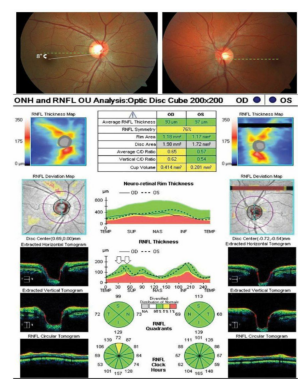

In [55]:
showingImage(res_image)

In [44]:
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Get the shape of the image (height, width, channels)
height, width, channels = img_rgb.shape

# Access RGB values of a specific pixel (e.g., pixel at row=100, column=200)
row = 100
column = 200
rgb_values = img_rgb[row, column]

print(f"RGB values at pixel ({row}, {column}): {rgb_values}")

RGB values at pixel (100, 200): [148 111  69]


# Converting to gray scale

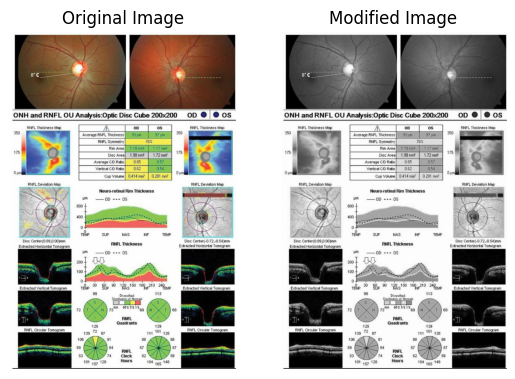

In [45]:
# this method converts the image to gray scale manual:


modified_img_rgb = np.zeros_like(img_rgb, dtype=np.uint8)

for row in range(height):
    for col in range(width):
        rgb_values = img_rgb[row, col]
        I_gray = 0.2989 * rgb_values[0] + 0.5870 * rgb_values[1] + 0.1140 * rgb_values[2]

        # Set modified values
        modified_img_rgb[row, col] = [I_gray, I_gray, I_gray]

# Display the original and modified images side by side
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_img_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.show()

In [46]:
# this uses the built in method from python:


def convert_to_grayscale(image_path):
    # image = cv.imread(image_path)
    gray_image = cv.cvtColor(image_path, cv.COLOR_BGR2GRAY)
    showingImage(gray_image)
    return gray_image


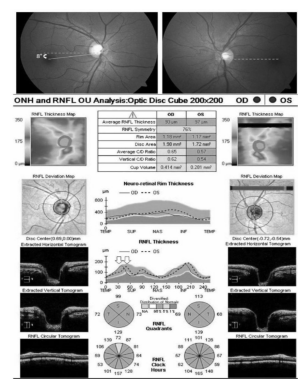

In [47]:
gray_image = convert_to_grayscale(res_image)

### Two methods are the same

# preprocessing

## 1- Histogram Equalization

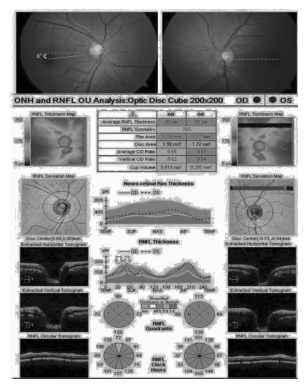

In [48]:
equ_img = cv.equalizeHist(gray_image)
showingImage(equ_img)

## 2- Radon transformation

In [52]:
angles = [i for i in range(0, 180, 5)]
radon_transformed = radon(equ_img, theta=angles)


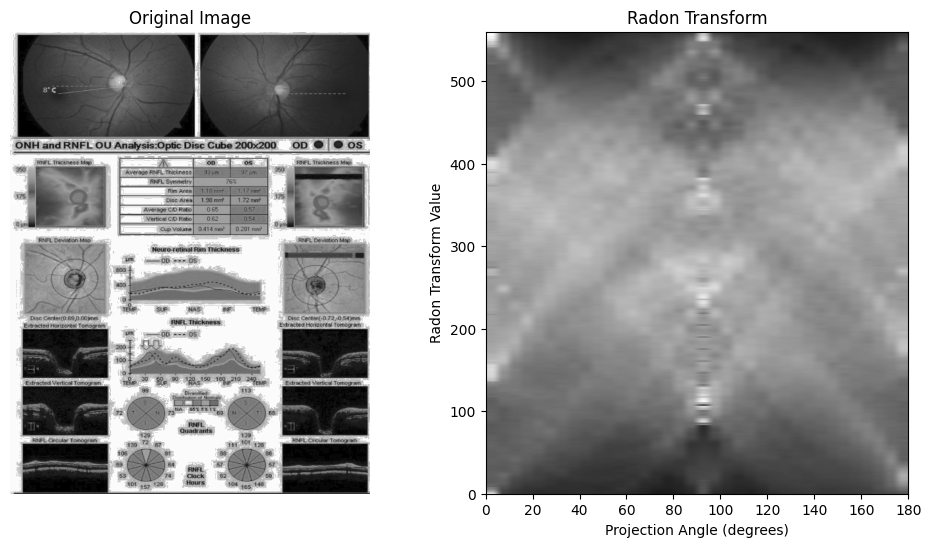

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(equ_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(radon_transformed, cmap='gray', extent=(0, 180, 0, radon_transformed.shape[0]), aspect='auto')
plt.title('Radon Transform')
plt.xlabel('Projection Angle (degrees)')
plt.ylabel('Radon Transform Value')
plt.show()

In [61]:
# import numpy as np
# from scipy.signal import spectrogram

# def compute_bispectrum(image_data):
#     # Compute the bispectrum using the spectrogram
#     _, _, bispectrum = spectrogram(image_data, nperseg=64, noverlap=32)

#     # Calculate the bispectral entropies
#     phase_distribution = np.angle(bispectrum)
#     p_phi = np.abs(bispectrum) / np.sum(np.abs(bispectrum))
#     Ph = np.sum(p_phi * np.log(p_phi))
#     P1 = -np.sum(p_phi * np.log(p_phi))
#     P2 = -np.sum(p_phi**2 * np.log(p_phi**2))
#     P3 = -np.sum(p_phi**3 * np.log(p_phi**3))

#     return Ph, P1, P2, P3

# # Example usage
# image_data = gray_image  # Load your image data here
# Ph, P1, P2, P3 = compute_bispectrum(image_data)
# print(f"Phase Entropy (Ph): {Ph:.4f}")
# print(f"Entropy 1 (P1): {P1:.4f}")
# print(f"Entropy 2 (P2): {P2:.4f}")
# print(f"Entropy 3 (P3): {P3:.4f}")
